#DATA UNDERSTANDING

##a. Penjelasan setiap fitur atau variable dari data tersebut :
Saya akan menjelaskan setiap fitur (kolom/variabel) berdasarkan data tersebut.

Berikut adalah penjelasan dari setiap variabel:

---

### **Fitur/Variabel dalam Dataset:**

1. **Channel**

   * **Tipe**: Kategori (1 atau 2)
   * **Deskripsi**: Menunjukkan jenis saluran distribusi pelanggan:

     * `1`: Horeca (Hotel, Restaurant, Cafe)
     * `2`: Retail
   * **Kegunaan**: Membantu dalam membedakan jenis pelanggan berdasarkan jalur distribusi.

2. **Region**

   * **Tipe**: Kategori (1, 2, atau 3)
   * **Deskripsi**: Lokasi geografis pelanggan:

     * `1`: Lisbon
     * `2`: Oporto
     * `3`: Other Region
   * **Kegunaan**: Mengelompokkan pelanggan berdasarkan lokasi wilayah operasional.

3. **Fresh**

   * **Tipe**: Numerik (Bilangan bulat)
   * **Deskripsi**: Total pengeluaran (dalam satuan monetary) untuk produk segar seperti sayuran dan buah-buahan.
   * **Kegunaan**: Mengetahui ketergantungan pelanggan terhadap produk segar.

4. **Milk**

   * **Tipe**: Numerik
   * **Deskripsi**: Total pengeluaran untuk produk susu (milk products).
   * **Kegunaan**: Mengukur minat pelanggan terhadap produk susu, bisa relevan untuk toko atau katering.

5. **Grocery**

   * **Tipe**: Numerik
   * **Deskripsi**: Total pengeluaran untuk produk kelontong (grocery).
   * **Kegunaan**: Mencerminkan volume pembelian item kebutuhan sehari-hari.

6. **Frozen**

   * **Tipe**: Numerik
   * **Deskripsi**: Total pengeluaran untuk produk beku (frozen food).
   * **Kegunaan**: Membedakan pelanggan yang membeli produk segar vs. beku.

7. **Detergents\_Paper**

   * **Tipe**: Numerik
   * **Deskripsi**: Total pengeluaran untuk produk pembersih dan kertas (detergen, tisu, dll).
   * **Kegunaan**: Menilai ketergantungan pelanggan terhadap produk non-makanan.

8. **Delicassen**

   * **Tipe**: Numerik
   * **Deskripsi**: Total pengeluaran untuk produk delicatessen seperti makanan siap saji, keju impor, dsb.
   * **Kegunaan**: Mendeteksi pelanggan yang lebih eksklusif/kelas atas.

##b. Eksplorasi Data
Berikut adalah hasil eksplorasi awal dari dataset **Wholesale customers data**:

---

### ✅ **1. Missing Values**

* **Tidak ada missing values**: Semua kolom memiliki 440 data (penuh), jadi *tidak perlu penanganan missing data*.

---

### ✅ **2. Tipe Data**

Semua kolom bertipe **integer (int64)**, terdiri dari:

* 2 kolom kategori: `Channel`, `Region`
* 6 kolom numerik: `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergents_Paper`, `Delicassen`

---

### ⚠️ **3. Potensi Outlier**

Berdasarkan statistik deskriptif (`describe()`), ada indikasi outlier:

* Contoh:

  * `Fresh`: Maksimum = **112151**, padahal Q3 hanya **16933.75**
  * `Milk`: Maksimum = **73498**, Q3 = **7190.25**
  * `Grocery`: Maksimum = **92780**, Q3 = **10655.75**
  * `Detergents_Paper`: Maksimum = **40827**, Q3 = **3922**

---

### Rangkuman Singkat:

| Kriteria         | Hasil                                 |
| ---------------- | ------------------------------------- |
| Missing Values   | ❌ Tidak ada                           |
| Tipe Data        | ✅ Sesuai (int semua)                  |
| Kategori         | Channel, Region                       |
| Indikasi Outlier | ⚠️ Ada, terutama di fitur pengeluaran |







##c. Visualisasi

In [13]:
from google.colab import files
uploaded = files.upload()


Saving Wholesale customers data.csv to Wholesale customers data.csv


In [14]:
import pandas as pd

df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


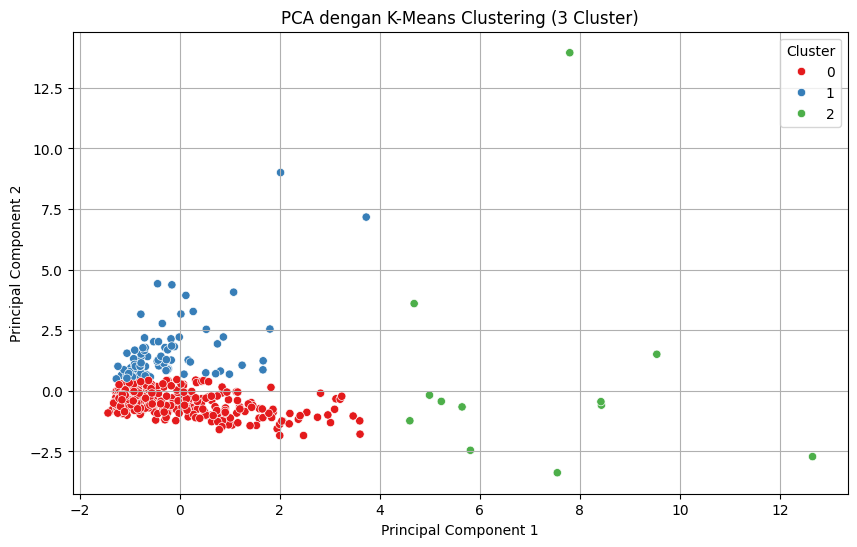

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
df = pd.read_csv('Wholesale customers data.csv')
df.head()


# Ambil fitur numerik
X = df.drop(columns=['Channel', 'Region'])

# Standardisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(X_pca)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('PCA dengan K-Means Clustering (3 Cluster)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#Prepocessing Data



In [19]:
# ===============================
# PREPROCESSING DATA WHOLESALE CUSTOMERS
# ===============================

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Langkah 1: Load Data
df = pd.read_csv("Wholesale customers data.csv")

# Langkah 2: Pisahkan fitur numerik
X = df.drop(columns=['Channel', 'Region'])  # Hanya ambil kolom numerik

# Langkah 3: Normalisasi (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Langkah 4: Reduksi Dimensi (PCA ke 2 komponen)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Langkah 5: Gabungkan hasil PCA dengan fitur kategori
final_df = pd.concat([df[['Channel', 'Region']], pca_df], axis=1)

# Tampilkan hasil akhir
print(final_df.head())

   Channel  Region       PC1       PC2
0        2       3  0.193291 -0.305100
1        2       3  0.434420 -0.328413
2        2       3  0.811143  0.815096
3        1       3 -0.778648  0.652754
4        2       3  0.166287  1.271434


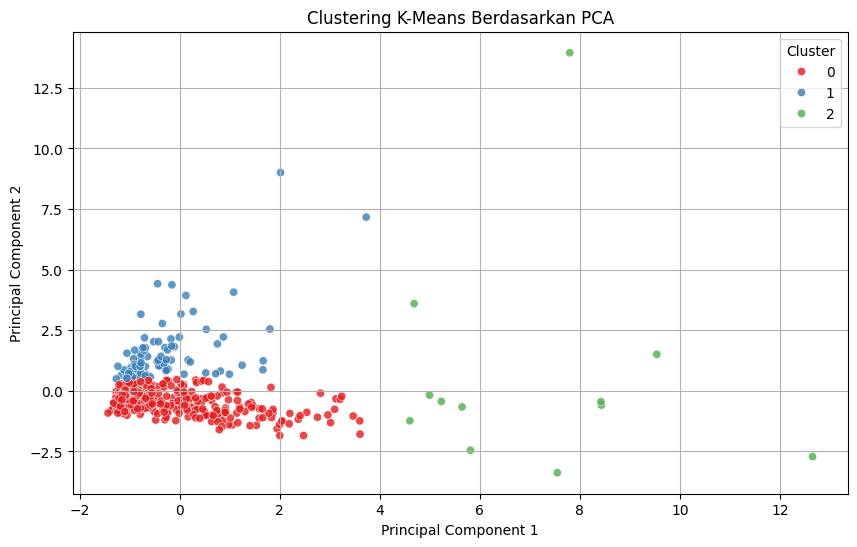

In [20]:
# ========== CLUSTERING DENGAN K-MEANS ==========
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Langkah 1: Jalankan K-Means dengan 3 cluster (misalnya)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Langkah 2: Tambahkan hasil cluster ke DataFrame final
final_df['Cluster'] = clusters

# Langkah 3: Visualisasi hasil clustering di PCA space
plt.figure(figsize=(10,6))
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', alpha=0.8)
plt.title('Clustering K-Means Berdasarkan PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Evaluasi Model

In [21]:
from sklearn.metrics import silhouette_score

# 1. Silhouette Score
sil_score = silhouette_score(pca_df, final_df['Cluster'])

# 2. Inertia dari model KMeans sebelumnya
inertia = kmeans.inertia_

print("Silhouette Score:", sil_score)
print("Inertia:", inertia)

Silhouette Score: 0.3817290130711036
Inertia: 1010.1475382065253
